<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/practice/glass_0723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### One-vs-Rest (OvR)와 One-vs-One (OvO)의 차이점

One-vs-Rest (OvR)와 One-vs-One (OvO)은 다중 클래스 분류 문제를 해결하기 위한 전략

#### **One-vs-Rest (OvR)**

One-vs-Rest (OvR), 또는 One-vs-All (OvA) 전략은 다음과 같은 방식으로 작동:

- 다중 클래스 분류 문제를 이진 분류 문제로 변환.
- 각 클래스에 대해 해당 클래스를 나머지 모든 클래스와 구분하는 이진 분류기를 학습.
- 최종 예측은 각 이진 분류기의 출력 확률을 기반으로 가장 높은 확률을 가진 클래스로 결정.

##### 예시
다음과 같은 세 개의 클래스 (A, B, C)가 있는 경우:
1. A vs (B, C)
2. B vs (A, C)
3. C vs (A, B)

각각의 이진 분류기를 학습한 후, 새로운 데이터 포인트가 주어지면 각 분류기의 출력 확률을 비교하여 가장 높은 확률을 가진 클래스를 선택.

#### One-vs-One (OvO)

One-vs-One (OvO) 전략은 다음과 같은 방식으로 작동:

- 각 클래스 쌍에 대해 이진 분류기를 학습.
- 총 $\frac{n(n-1)}{2}$ 개의 이진 분류기를 학습 (n은 클래스의 개수).
- 각 이진 분류기는 두 클래스 간의 구분을 학습.
- 최종 예측은 다수결 투표를 통해 결정.

##### 예시
다음과 같은 세 개의 클래스 (A, B, C)가 있는 경우:
1. A vs B
2. A vs C
3. B vs C

새로운 데이터 포인트가 주어지면 각 이진 분류기의 예측을 기반으로 다수결 투표를 통해 최종 클래스를 결정.

#### 차이점 요약

| Feature                    | One-vs-Rest (OvR)                      | One-vs-One (OvO)                  |
|----------------------------|----------------------------------------|-----------------------------------|
| 분류기 수                    | 클래스 수 (n)                            | \(\frac{n(n-1)}{2}\)                   |
| 분류기 당 데이터 양            | 전체 데이터셋                            | 두 클래스 간의 데이터만 사용          |
| 예측 방식                    | 가장 높은 확률의 클래스를 선택             | 다수결 투표로 최종 클래스를 결정      |
| 계산 비용                    | 상대적으로 낮음                           | 상대적으로 높음                      |
| 구현의 복잡성                | 낮음                                     | 높음                                 |

#### Logistic Regression과 OvR, OvO

`LogisticRegression` 모델에서 `multi_class` 파라미터를 설정하여 OvR 또는 OvO 전략을 사용할 수 있음:

- `multi_class='ovr'`: One-vs-Rest (기본값)
- `multi_class='multinomial'`와 `solver='lbfgs'` 또는 `solver='saga'`: 소프트맥스를 사용한 다중 클래스 분류 (OvO와 유사하지만 완전히 동일하지는 않음)

---

유리 데이터
- 데이터 셋: https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv
- 데이터 설명 : https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.names


특성은 9가지

- RI: 굴절률
- Na: 나트륨
- Mg: 마그네슘
- Al: 알루미늄
- SI: 실리콘
- K: 칼륨
- Ca: 칼슘
- Ba: 바륨
- Fe: 철
화학성분 특성은 산화물의 중량 퍼센트로 기록되어있다.



예측할 클래스는 7가지이다

- Class 1: 빌딩 창문(float processed)
- Class 2: 빌딩 창문(non-float processed)
- Class 3: 자동차 창문(float processed)
- Class 4: 자동차 창문 (non-float processed)
- Class 5: 컨테이너
- Class 6: 식기류
- Class 7: 헤드램프

In [ ]:
# 필요 모듈 임포트
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y):
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()


#데이터 읽어오기
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
df = pd.read_csv(url, header=None)
data = df.values
X, y = data[:, :-1], data[:, -1]

0.10.1


Class=1, n=70 (32.710%)
Class=2, n=76 (35.514%)
Class=3, n=17 (7.944%)
Class=5, n=13 (6.075%)
Class=6, n=9 (4.206%)
Class=7, n=29 (13.551%)


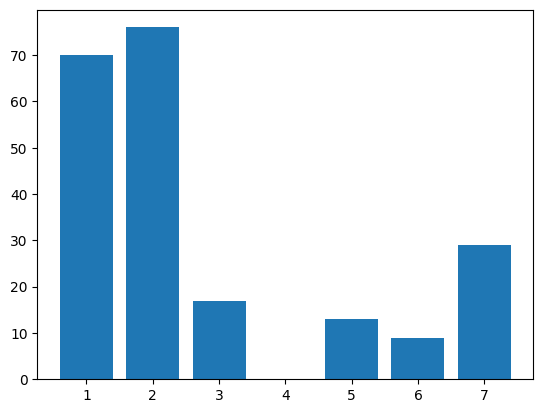

In [ ]:
count_and_plot(y)

1. 그냥해보기

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# 데이터셋 로드
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv"
df = pd.read_csv(url, header=None)
df.columns = ['RI', 'Na', 'Mg', 'Al', 'SI', 'K', 'Ca', 'Ba', 'Fe', 'Class']

# 데이터와 레이블 분리
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 훈련 및 예측 (OvR)
model_ovr = OneVsRestClassifier(RandomForestClassifier(random_state=42))
model_ovr.fit(X_train, y_train)
y_pred_ovr = model_ovr.predict(X_test)

# 모델 훈련 및 예측 (OvO)
model_ovo = OneVsOneClassifier(RandomForestClassifier(random_state=42))
model_ovo.fit(X_train, y_train)
y_pred_ovo = model_ovo.predict(X_test)

# 출력 레이블 이진화
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_pred_ovr_binarized = label_binarize(y_pred_ovr, classes=np.unique(y))
y_pred_ovo_binarized = label_binarize(y_pred_ovo, classes=np.unique(y))

# ROC AUC 계산 (OvR 방식)
roc_auc_ovr = roc_auc_score(y_test_binarized, y_pred_ovr_binarized, average='weighted', multi_class='ovr')

# ROC AUC 계산 (OvO 방식)
roc_auc_ovo = roc_auc_score(y_test_binarized, y_pred_ovo_binarized, average='weighted', multi_class='ovo')

# 평가 지표 출력
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
precision_ovr = precision_score(y_test, y_pred_ovr, average='weighted')
recall_ovr = recall_score(y_test, y_pred_ovr, average='weighted')
f1_ovr = f1_score(y_test, y_pred_ovr, average='weighted')

accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
precision_ovo = precision_score(y_test, y_pred_ovo, average='weighted')
recall_ovo = recall_score(y_test, y_pred_ovo, average='weighted')
f1_ovo = f1_score(y_test, y_pred_ovo, average='weighted')

print(f"**One-vs-Rest (OvR) 방식**")
print(f"정확도: {accuracy_ovr:.2f}, 정밀도: {precision_ovr:.2f}, 재현율: {recall_ovr:.2f}, F1 Score: {f1_ovr:.2f}")
print(f"ROC AUC (OvR): {roc_auc_ovr:.2f}")

print(f"\n**One-vs-One (OvO) 방식**")
print(f"정확도: {accuracy_ovo:.2f}, 정밀도: {precision_ovo:.2f}, 재현율: {recall_ovo:.2f}, F1 Score: {f1_ovo:.2f}")
print(f"ROC AUC (OvO): {roc_auc_ovo:.2f}")

**One-vs-Rest (OvR) 방식**
정확도: 0.86, 정밀도: 0.87, 재현율: 0.86, F1 Score: 0.85
ROC AUC (OvR): 0.90

**One-vs-One (OvO) 방식**
정확도: 0.79, 정밀도: 0.81, 재현율: 0.79, F1 Score: 0.78
ROC AUC (OvO): 0.86


- 언더 샘플링의 단점은 잠재적으로 정보의 가치가 높은 데이터도 버려서 유용한 데이터가 사라지는 위험이 있다는 것이다.
- 오버 샘플링 방식에는 여러 가지가 있지만 가장 단순한 방식은 동일한 데이터를 똑같이 복사해서 수만 늘리는 것이다. 이럴 경우 오버 피팅의 위험이 생긴다.
- 그래서 사용하는 것 중 하나 SMOTE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import SMOTE

# 데이터 로드
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv"
column_names = ["ID", "RI", "Na", "Mg", "Al", "SI", "K", "Ca", "Ba", "Fe", "Class"]
data = pd.read_csv(url, names=column_names, header=None)

# 클래스 4를 제외한 데이터
data_filtered = data[data['Class'] != 4]

# 결측치 확인 및 처리
data_filtered.fillna(data_filtered.mean(), inplace=True)

# 특성과 레이블 분리
X = data_filtered.drop(['ID', 'Class'], axis=1)
y = data_filtered['Class']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE를 사용하여 소수 클래스 샘플 생성
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 모델 훈련
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 출력레이블 이진화
lb = LabelBinarizer()
lb.fit(y)
y_test_binarized = lb.transform(y_test)
y_pred_binarized = lb.transform(y_pred)

# ROC AUC (OvO 방식)
roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='weighted', multi_class='ovo')

# Print evaluation metrics
print(f"정확도: {accuracy:.2f}, 정밀도: {precision:.2f}, 재현율: {recall:.2f}, F1 Score: {f1:.2f}, ROC AUC (OvO): {roc_auc:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


ValueError: Input y contains NaN.